This notebook will be mainly used for the Capstone Project.

In [8]:
import pandas as pd
import numpy as np

Hello Capstone Project Course!

Week 3 Assignment - Segmenting and Clustering Neighorhoods in the city of Toronto

 Question 1 - Scrape the following Wikipedia page - "https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M,"

In [3]:
!pip install wikipedia

  Stored in directory: /home/dsxuser/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [9]:
import pandas as pd 
import wikipedia as wp
from bs4 import BeautifulSoup

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

df = pd.read_html(html, header = 0)[0]

df = df[df.Borough != 'Not assigned']

df = df.groupby(['Postal code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

df

,Postal code,Borough,Neighborhood
0,M1B,Scarborough,Malvern / Rouge
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek
2,M1E,Scarborough,Guildwood / Morningside / West Hill
3,M1G,Scarborough,Woburn
4,M1H,Scarborough,Cedarbrae
5,M1J,Scarborough,Scarborough Village
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West
9,M1N,Scarborough,Birch Cliff / Cliffside West


In [10]:
df.shape

(103, 3)

Question 2

In [18]:
import requests
import io

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

df = pd.read_html(html, header = 0)[0]

df = df[df.Borough != 'Not assigned']

df = df.groupby(['Postal code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

c.columns = ['Postal code', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postal code')

df = df[['Postal code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]
df

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M1B,Scarborough,Malvern / Rouge,43.806686,-79.194353
1,M1C,Scarborough,Rouge Hill / Port Union / Highland Creek,43.784535,-79.160497
2,M1E,Scarborough,Guildwood / Morningside / West Hill,43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,Kennedy Park / Ionview / East Birchmount Park,43.727929,-79.262029
7,M1L,Scarborough,Golden Mile / Clairlea / Oakridge,43.711112,-79.284577
8,M1M,Scarborough,Cliffside / Cliffcrest / Scarborough Village West,43.716316,-79.239476
9,M1N,Scarborough,Birch Cliff / Cliffside West,43.692657,-79.264848


Question 3

In [20]:
!pip install shapely

     |████████████████████████████████| 1.8MB 23.3MB/s eta 0:00:01


In [22]:
!pip install geopandas

     |████████████████████████████████| 931kB 22.8MB/s eta 0:00:01
     |████████████████████████████████| 10.4MB 21.7MB/s eta 0:00:01
     |████████████████████████████████| 14.7MB 16.0MB/s eta 0:00:01


/opt/conda/envs/Python36/lib/python3.6/site-packages/geopandas/plotting.py:532: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  UserWarning,


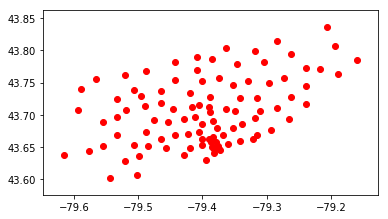

In [23]:
%matplotlib inline

import wikipedia as wp
import pandas as pd 

import requests
import io

from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt

html = wp.page("List of postal codes of Canada: M").html().encode("UTF-8")

df = pd.read_html(html, header = 0)[0]

df = df[df.Borough != 'Not assigned']

df = df.groupby(['Postal code', 'Borough'])['Neighborhood'].apply(list).apply(lambda x:', '.join(x)).to_frame().reset_index()

for index, row in df.iterrows():
    if row['Neighborhood'] == 'Not assigned':
        row['Neighborhood'] = row['Borough']

url="http://cocl.us/Geospatial_data"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

c.columns = ['Postal code', 'Latitude', 'Longitude']
df = pd.merge(c, df, on='Postal code')

df = df[['Postal code', 'Borough', 'Neighborhood', 'Latitude', 'Longitude']]

df['Coordinates'] = list(zip(df.Longitude, df.Latitude))
df['Coordinates'] = df['Coordinates'].apply(Point)
gdf = gpd.GeoDataFrame(df, geometry='Coordinates')

cities = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))
ax = cities[cities.name == "Toronto"].plot(
    color='white', edgecolor='black')

gdf.plot(ax=ax, color='red')
plt.show()